# The Spark Foundation

## Author : Hemavathy.R

**Task 1:Prediction Using Supervised Machine Learning**

## PROBLEM DEFINITION

* Predict the percentage of a student based on the Number of study hours.
* This is a simple linear regression task involving just 2 variables.
* What will be the predicted score if a student studies for 9.25 hrs/ day?

**Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [8]:
dataset=pd.read_excel(r'C:\Users\sweth\Downloads\Grip task_1 Data.xlsx')
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Exploring Data**

In [11]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**DATA VISUALIZATION**

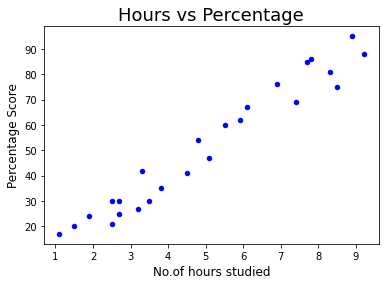

In [12]:
# Plotting the distribution of scores
dataset.plot(kind ='scatter',x='Hours' ,y='Scores',color='blue')
plt.title ('Hours vs Percentage',size =18)
plt.xlabel ('No.of hours studied',size =12)
plt.ylabel ('Percentage Score' ,size =12)
plt.show()

*From the above plotting, we can easily indentify that there is a positive linear
correlation between the number of hours studied and percentage of score*

**DATA PREPARATION**

*Now we have to divide the data into "attributes" (inputs) and "labels" (outputs). Here
attributes will be Hours and labels will be Scores*

In [14]:
x= dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values

In [15]:
# Splitting the dataset into Train and Test data
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size =0.2,random_state =0)

In [16]:
print(x_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [17]:
print(y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


**TRAINING THE ALGORITHM**

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print("Training complete")

Training complete


In [19]:
# Intercept of the Regression line
print(reg.intercept_)

2.018160041434662


In [20]:
# slope of the Regression line
print(reg.coef_)

[9.91065648]


<function matplotlib.pyplot.show(close=None, block=None)>

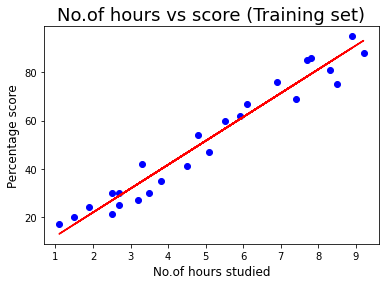

In [21]:
# Plotting the Regression line
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y,color ='blue')
plt.title('No.of hours vs score (Training set)',size = 18)
plt.xlabel('No.of hours studied',size = 12)
plt.ylabel('Percentage score',size = 12)
plt.plot(x,line,color ='red')
plt.show

**MAKING PREDICTIONS**

In [22]:
print(x_test)
y_pred = reg.predict(x_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [23]:
v=pd.DataFrame({'actual': y_test,'Predicted':y_pred})
v

,actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**EVALUATING THE MODEL**

In [24]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean sqaure Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
Mean sqaure Error: 21.598769307217456


**TESTING WITH OUR OWN DATA**


In [25]:
h=9.25
y_pred=reg.predict([[9.25]])
print('The Predicted Score is',y_pred)
print("If a student studies for {} hours per day he/she will score {} % in exam. ".format(h,y_pred))

The Predicted Score is [93.69173249]
If a student studies for 9.25 hours per day he/she will score [93.69173249] % in exam. 
